In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img =  cv2.imread('./test_image/m1.jpg')
img.shape

(168, 300, 3)

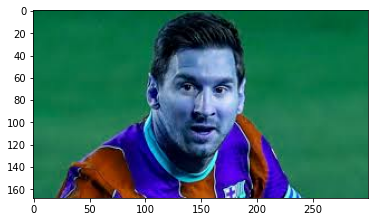

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

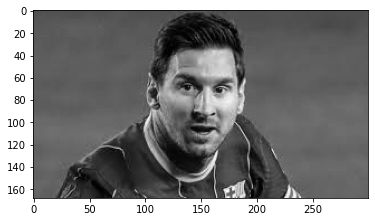

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[106,  33,  94,  94]], dtype=int32)

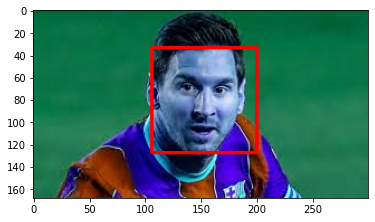

In [7]:
(x, y, w, h) = faces[0]

face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

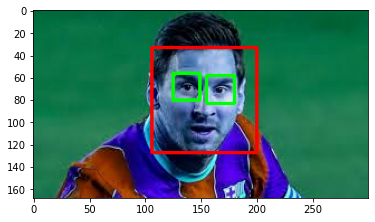

In [8]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,2),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
    

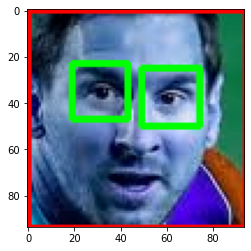

In [9]:
plt.imshow(roi_color)

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

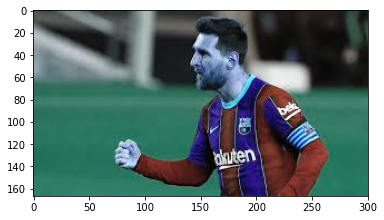

In [11]:
or_img = cv2.imread('./test_image/m2.jpg')
plt.imshow(or_img)

In [12]:
cropped_img = get_cropped_image_if_2_eyes('./test_image/m2.jpg')
cropped_img

In [13]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [14]:
import os
import shutil
# remove directory if already exist
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

In [15]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

os.mkdir(path_to_cr_data)

In [16]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/lionel_messi',
 './dataset/neymar',
 './dataset/xavi_hernandez',
 './dataset/zlatan_ibrahimovic']

In [17]:
cropped_img_dirs = []
player_file_names = {}

for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split('/')[-1]
    player_file_names[player_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            flip_roi_color = cv2.flip(roi_color, 1)
            cropped_folder = path_to_cr_data + player_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
            
            cropped_file_name = player_name + str(count) +'.png'
            flip_cropped_file_name = player_name + '_flip' + str(count) +'.png'
            
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            flip_cropped_file_path = os.path.join(cropped_folder, flip_cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            cv2.imwrite(flip_cropped_file_path, flip_roi_color)
            
            player_file_names[player_name].append(cropped_file_path)
            player_file_names[player_name].append(flip_cropped_file_path)
            
            count += 1
    

Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/neymar
Generating cropped images in folder:  ./dataset/cropped/xavi_hernandez
Generating cropped images in folder:  ./dataset/cropped/zlatan_ibrahimovic


In [18]:
import numpy as np
import pywt
import cv2

In [19]:
def w2d(img, mode='haar', level=1):
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

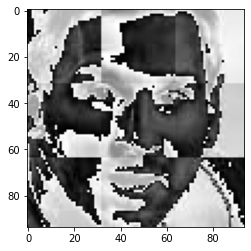

In [20]:
img = cv2.imread('./test_image/m1.jpg')
cr_img = get_cropped_image_if_2_eyes('./test_image/m1.jpg')
im_har = w2d(cr_img, mode='haar', level=5)
plt.imshow(im_har, cmap='gray')

In [21]:
player_file_names

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo_flip1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo_flip2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo3.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo_flip3.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo4.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo_flip4.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo5.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo_flip5.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo6.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo_flip6.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo7.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo_flip7.png',
  './dataset/cropped/cristiano_ron

In [22]:
class_mapping = {}
label = 0 
for name in player_file_names.keys():
    class_mapping[name] = label
    label += 1
class_mapping

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'neymar': 2,
 'xavi_hernandez': 3,
 'zlatan_ibrahimovic': 4}

In [23]:
X = []
y = []
for name, training_images in player_file_names.items():
    for training_img in training_images:
        img = cv2.imread(training_img)
        scaled_raw_img = cv2.resize(img, (32, 32))
        
        img_har = w2d(img, mode='db1', level=5)
        scaled_har_img = cv2.resize(img_har, (32, 32))
        
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_har_img.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_mapping[name])

In [24]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(284, 4096)

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7464788732394366

In [27]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.81      0.68      0.74        19
           2       0.67      0.71      0.69        14
           3       0.90      0.64      0.75        14
           4       0.82      0.82      0.82        11

    accuracy                           0.75        71
   macro avg       0.77      0.76      0.75        71
weighted avg       0.77      0.75      0.75        71



In [28]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [29]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [30]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.794020,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.559247,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.798782,{'logisticregression__C': 1}


In [31]:
best_estimators['svm'].score(X_test, y_test)

0.8591549295774648

In [32]:
best_clf = best_estimators['svm']

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[13,  0,  0,  0,  0],
       [ 0, 16,  1,  2,  0],
       [ 0,  0, 12,  2,  0],
       [ 1,  1,  1, 10,  1],
       [ 0,  1,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

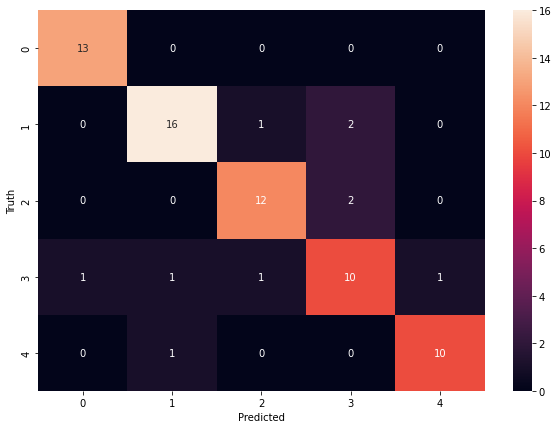

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
class_mapping

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'neymar': 2,
 'xavi_hernandez': 3,
 'zlatan_ibrahimovic': 4}

In [36]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [37]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_mapping))